<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml02_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn(scikit-learn) 모듈의 neighbors 하위 모듈에서 KNeighborsClassifier 클래스를 임포트
from sklearn.neighbors import KNeighborsClassifier

# 데이터 준비

In [2]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


# 데이터 탐색

In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


## 카테고리 변수 탐색

In [6]:
fish.Species.value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


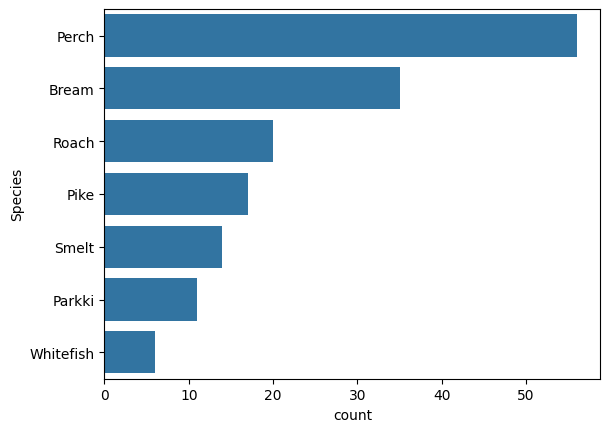

In [13]:
sns.countplot(data=fish, y='Species',
              order=fish.Species.value_counts().index)
plt.show()

## 숫자 타입 변수 탐색

In [14]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


어종을 제외한 5개 변수의 box plot, histogram을 그려보세요.

In [18]:
features = fish.columns[1:]
print(features)

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


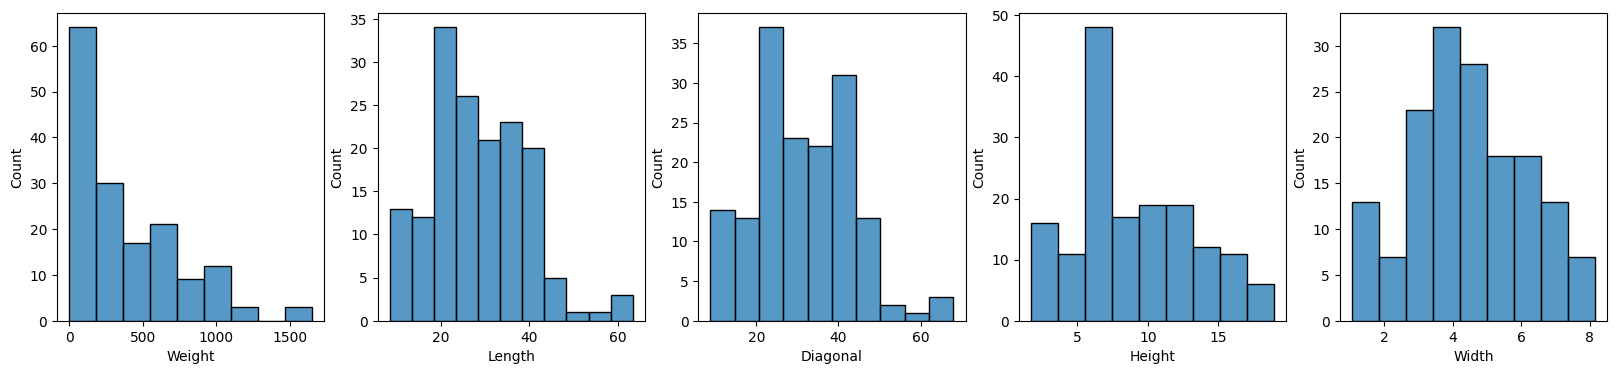

In [21]:
fig, axes = plt.subplots(ncols=len(features), figsize=(20, 4))

for i, var in enumerate(features):
    sns.histplot(data=fish, x=var, ax=axes[i])

plt.show()

## 변수들 간의 상관관계 시각화